### Assignment - 8
Below is the Assignment-8 image:

![Assignment-8 Screenshot](pic-8.png)

# Concept:
- CART (Classification and Regression Tree) is a binary decision tree algorithm.
- It uses Gini Impurity (for classification) or MSE (for regression) to find the best split.
- Output: A tree where each leaf represents a class label.


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


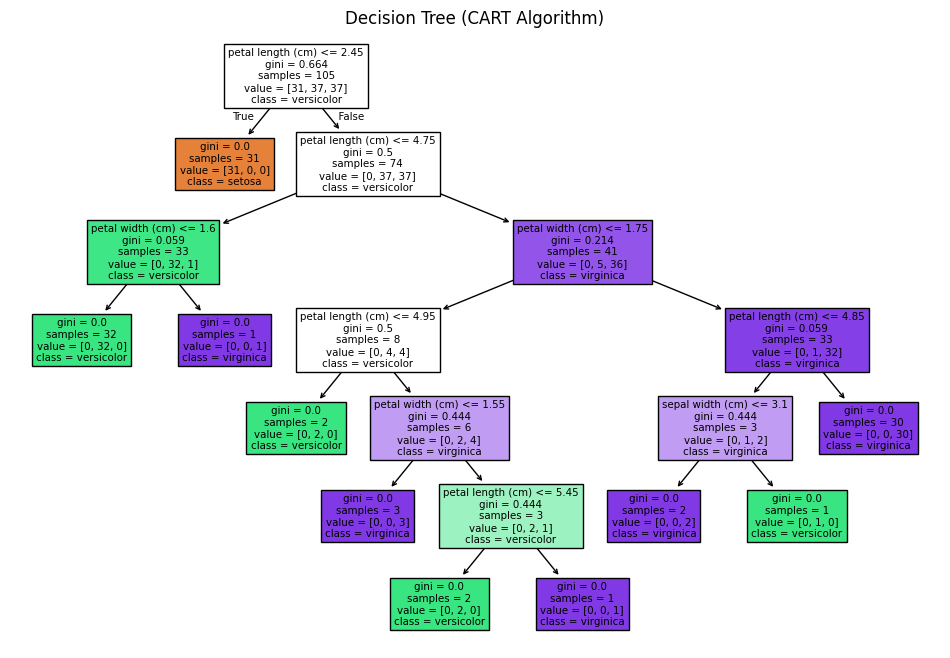

In [ ]:
# ---- Import Libraries ----
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#Load Dataset 
iris = load_iris()
X = iris.data
y = iris.target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree (CART)
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)

#Train Model 
cart_model.fit(X_train, y_train)

#Predictions 
y_pred = cart_model.predict(X_test)

# Evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization 
plt.figure(figsize=(12,8))
plot_tree(cart_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (CART Algorithm)")
plt.show()

In [ ]:
#2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create Dataset
data = {
    'Outlook': ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy'],
    'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'Humidity': ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
    'Wind': ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

df = pd.DataFrame(data)

#  OneR Implementation
def oneR(df, target):
    features = df.columns.drop(target)
    best_feature = None
    lowest_error = float('inf')
    best_rules = {}

    for feature in features:
        rules = {}
        for value, subset in df.groupby(feature):
            most_common = subset[target].mode()[0]
            rules[value] = most_common
        preds = df[feature].map(rules)
        error = sum(preds != df[target])
        if error < lowest_error:
            lowest_error = error
            best_feature = feature
            best_rules = rules
    
    print(f"\nBest Feature: {best_feature}")
    print("Rules:")
    for val, outcome in best_rules.items():
        print(f"  If {best_feature} = {val} → {target} = {outcome}")
    print(f"\nAccuracy: {1 - lowest_error/len(df):.2f}")

# Run OneR 
oneR(df, 'PlayTennis')


Best Feature: Outlook
Rules:
  If Outlook = Overcast → PlayTennis = Yes
  If Outlook = Rainy → PlayTennis = Yes
  If Outlook = Sunny → PlayTennis = No

Accuracy: 0.71
